In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Save the model
model.save("character_recognition_model.h5")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.8866 - loss: 0.3566 - val_accuracy: 0.9850 - val_loss: 0.0482
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9854 - loss: 0.0491 - val_accuracy: 0.9876 - val_loss: 0.0399
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9904 - loss: 0.0313 - val_accuracy: 0.9903 - val_loss: 0.0287
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9918 - loss: 0.0240 - val_accuracy: 0.9906 - val_loss: 0.0333
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9944 - loss: 0.0177 - val_accuracy: 0.9895 - val_loss: 0.0384


Enter the path to the character image: /content/download (2).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted Character: 5


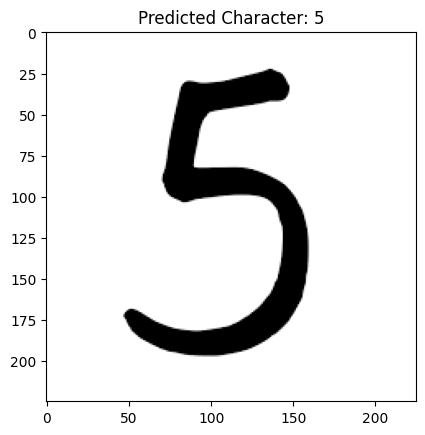

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = load_model("character_recognition_model.h5")

def preprocess_image(image_path):
    """
    Load and preprocess the input image to match the format expected by the model.
    """
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels
    img = np.array(img)
    img = img.reshape(1, 28, 28, 1)  # Reshape to (1, 28, 28, 1)
    img = img / 255.0  # Normalize the image
    return img

def predict_character(image_path):
    """
    Predict the character in the input image.
    """
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class[0]

# Get input from the user (an image file path)
image_path = input("Enter the path to the character image: ")

# Predict the character
predicted_character = predict_character(image_path)
print(f"Predicted Character: {predicted_character}")

# Display the input image and the predicted character
img = Image.open(image_path).convert('L')
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Character: {predicted_character}")
plt.show()
